In [1]:
#import sklearn.datasets.fetch_california_housing
import numpy as np
from sklearn import datasets
#import plotly as py

cal_hou = datasets.fetch_california_housing()

In [2]:
cal_hou.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
cal_hou['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
import pandas as pd

df = pd.DataFrame(data=cal_hou['data'], columns=cal_hou['feature_names']) 
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
cal_hou['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
aux = cal_hou['feature_names'].copy()
aux.remove('Latitude')
aux.remove('Longitude')
cal_hou['feature_names'] = aux
print(aux)
data_aux = cal_hou['data'].copy()
data_aux = np.delete(data_aux,6,1)
data_aux = np.delete(data_aux,6,1)
#data_aux

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [7]:
df = pd.DataFrame(data=data_aux, columns=aux) 
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [9]:
import collections
import operator
print(df['MedInc'][87])
medinc = sorted(df['MedInc'].items(), key=lambda kv: kv[1])
l = len(medinc)
print(l)
for x in range(0,l):
    a,b = medinc[x]
    medinc[x] = (x,b)
#print(medinc)
medincmap = dict(medinc)
#medincmap.values().head()

0.76
20640


In [10]:
df2 = df.copy()
df2['MedIncOrd'] = sorted(df['MedInc'].values)

In [11]:
print(df2.head())
df2['MedIncOrd'].plot.line()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  MedIncOrd
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     0.4999
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     0.4999
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     0.4999
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     0.4999
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     0.4999


In [12]:
# Definición de una función
def clasificarDF2(x):
    if x < 3:
        return 'baja'
    elif x < 7:
        return 'media'
    else:
        return 'alta'

In [13]:
from pandas.plotting import scatter_matrix

dic_colors = { 'baja': 'red', 'media': 'orange', 'alta': 'green' }
colors = df2['MedIncOrd'].map(clasificarDF2).map(dic_colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B06C51F5C0>,
      dtype=object)

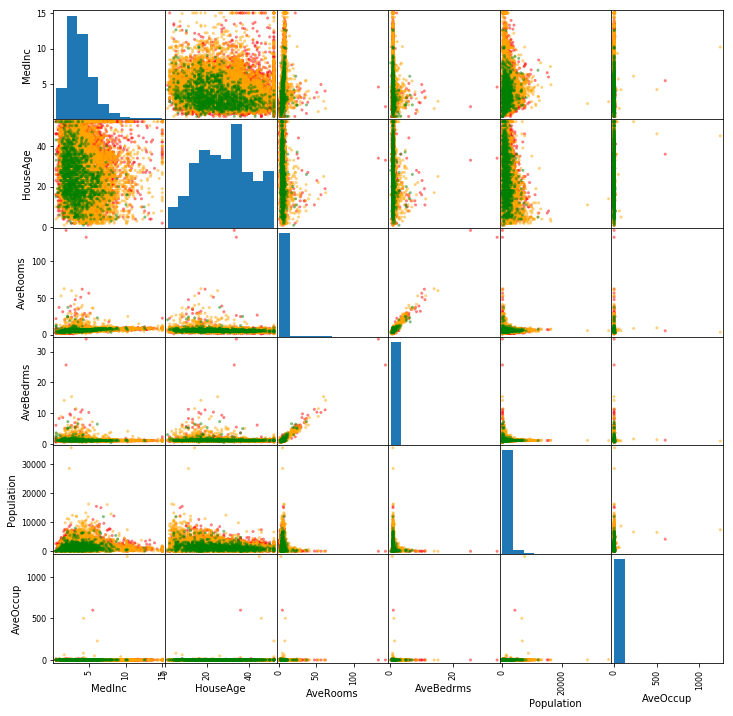

In [14]:
scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color=colors)

In [15]:
#normalizamos los datos:

from sklearn.preprocessing import Normalizer

# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = Normalizer()
df_values_normal = scaler.fit_transform(df.values)
df_normal = pd.DataFrame(data=df_values_normal, columns=cal_hou['feature_names']) 
df_normal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,0.025632,0.126234,0.021503,0.003152,0.991400,0.007868
1,0.003457,0.008746,0.002598,0.000405,0.999952,0.000879
2,0.014548,0.104240,0.016615,0.002152,0.994289,0.005617
3,0.010068,0.092777,0.010379,0.001915,0.995570,0.004546
4,0.006778,0.091639,0.011070,0.001905,0.995698,0.003844


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B06CBD4048>,
      dtype=object)

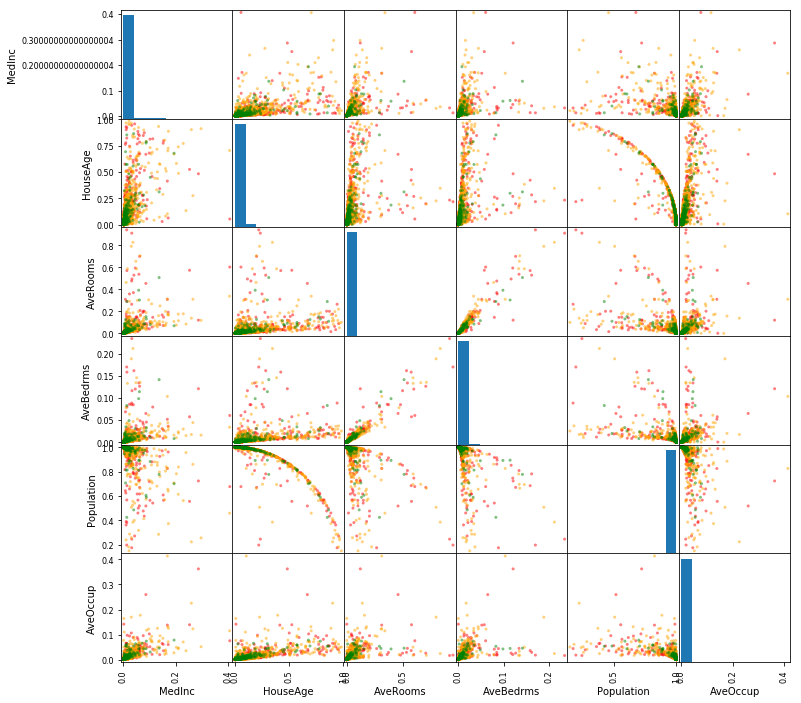

In [16]:
scatter_matrix(df_normal, figsize = (12, 12), diagonal = 'hist', color=colors)

In [17]:
# Estandarizamos los datos para que estén centrados en 0 y con varianza 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_values_std = scaler.fit_transform(df.values)
df_std = pd.DataFrame(data=df_values_std, columns=cal_hou['feature_names']) 
df_std.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616


In [18]:
df_std.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-2.522018e-14,5.878911e-16,4.640911e-15,5.519526e-15,-7.506747e-17,-7.361326e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B074C12B00>,
      dtype=object)

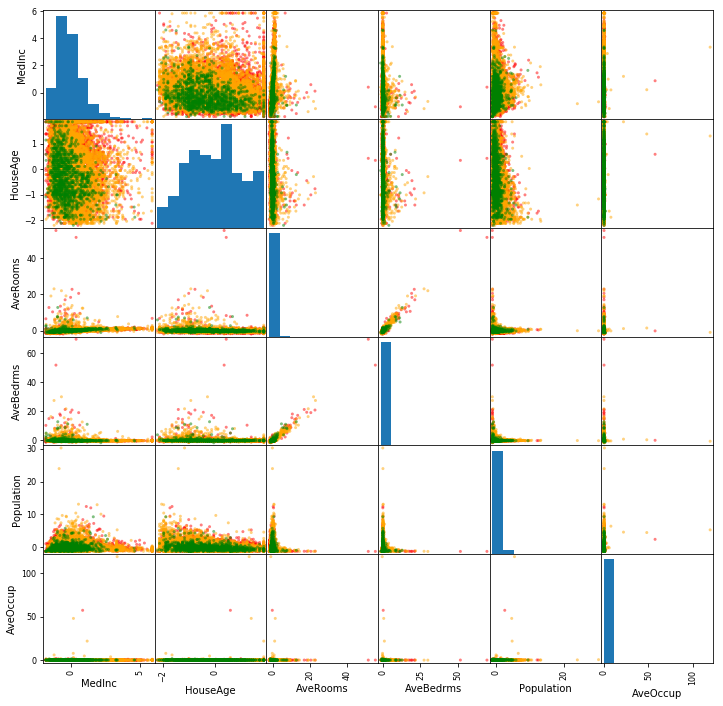

In [19]:
scatter_matrix(df_std, figsize = (12, 12), diagonal = 'hist', color=colors)

In [28]:
#normalizamos los datos:

from sklearn.preprocessing import Normalizer
from math import log


# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = Normalizer()
#TODO: HAY QUE MAPEAR ESTO CON EL LOG
df_values_log = [log(y) for y in df.values]
#df_values_log = map(log,df_values_log)
print(df_values_log)
df_normal = pd.DataFrame(data=df_values_normal, columns=cal_hou['feature_names']) 
df_normal.head()
df_values_log

TypeError: only size-1 arrays can be converted to Python scalars